## Условие 1: Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import seaborn as sns

In [8]:
df = pd.read_csv('kc_house_data.csv', encoding = '1251')


In [9]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


- 1.1. Скачать следующие данные: kc-house-data и laptop_price
- 1.2. Изучите стоимости недвижимости
- 1.3. Изучите распределение квадратуры жилой
- 1.4. Изучите распределение года постройки

In [10]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Из предварительного анализа цен видно, что 75% предложений не превышают 645 тыс.,средняя цена дома составляет 540 тыс.

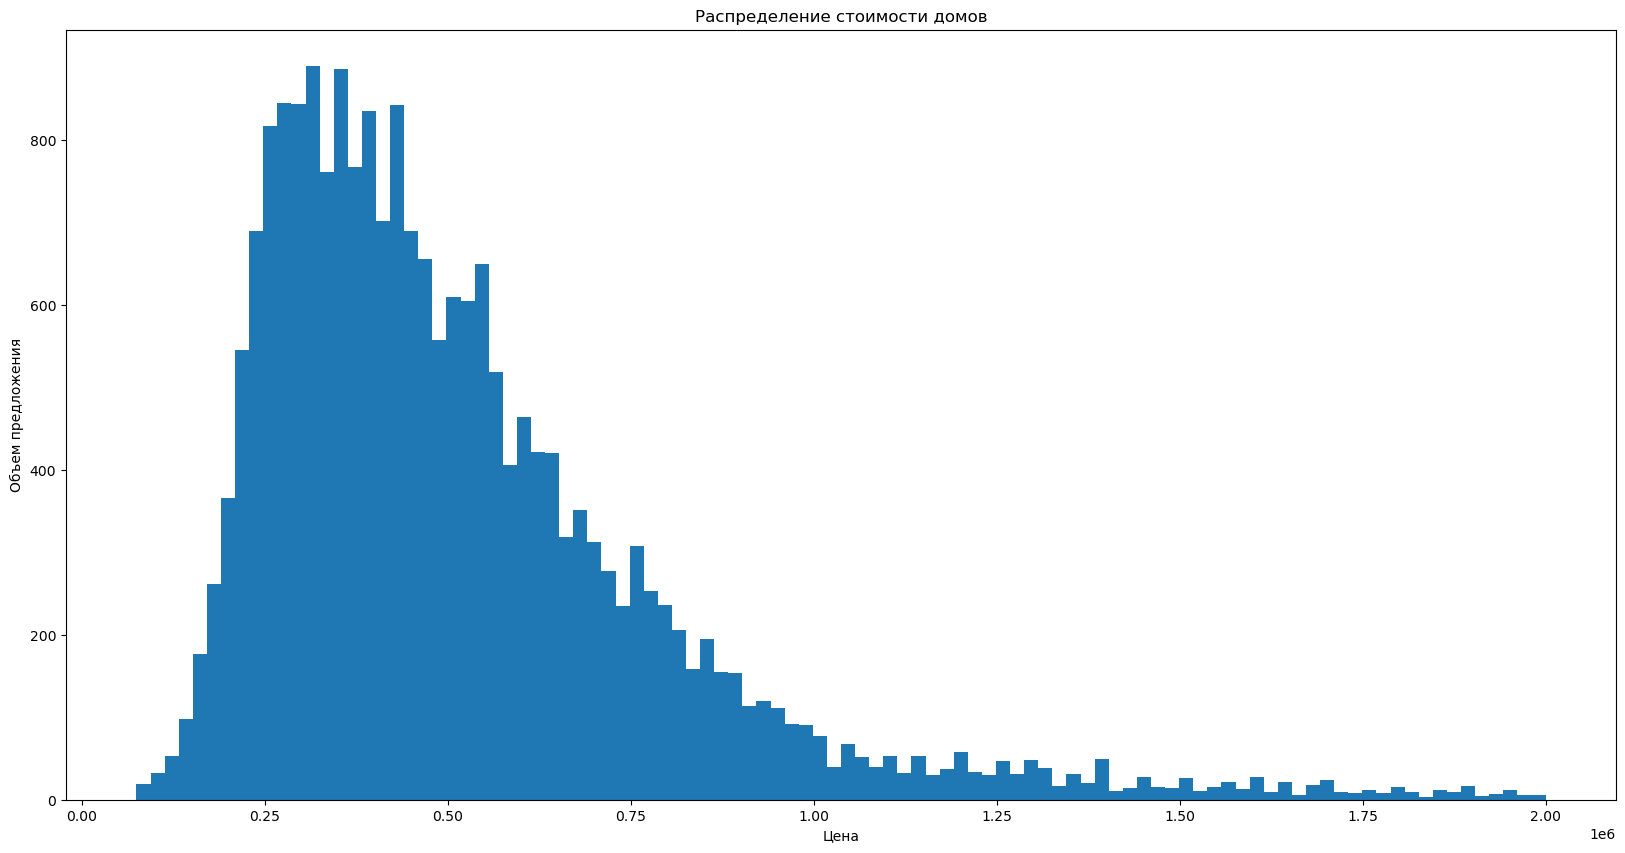

In [11]:
plt.figure(figsize=(20, 10))
plt.hist(df[(df['price']<2000000)]['price'], bins=100)
plt.title('Распределение стоимости домов')
plt.xlabel('Цена')
plt.ylabel('Объем предложения');

Из гистограммы можно сделать вывод, что наибольшее число домов представлено в ценовом диапазоне от 300 до 700 тыс. (приблизительно).

In [12]:
df['sqft_living'].describe()


count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

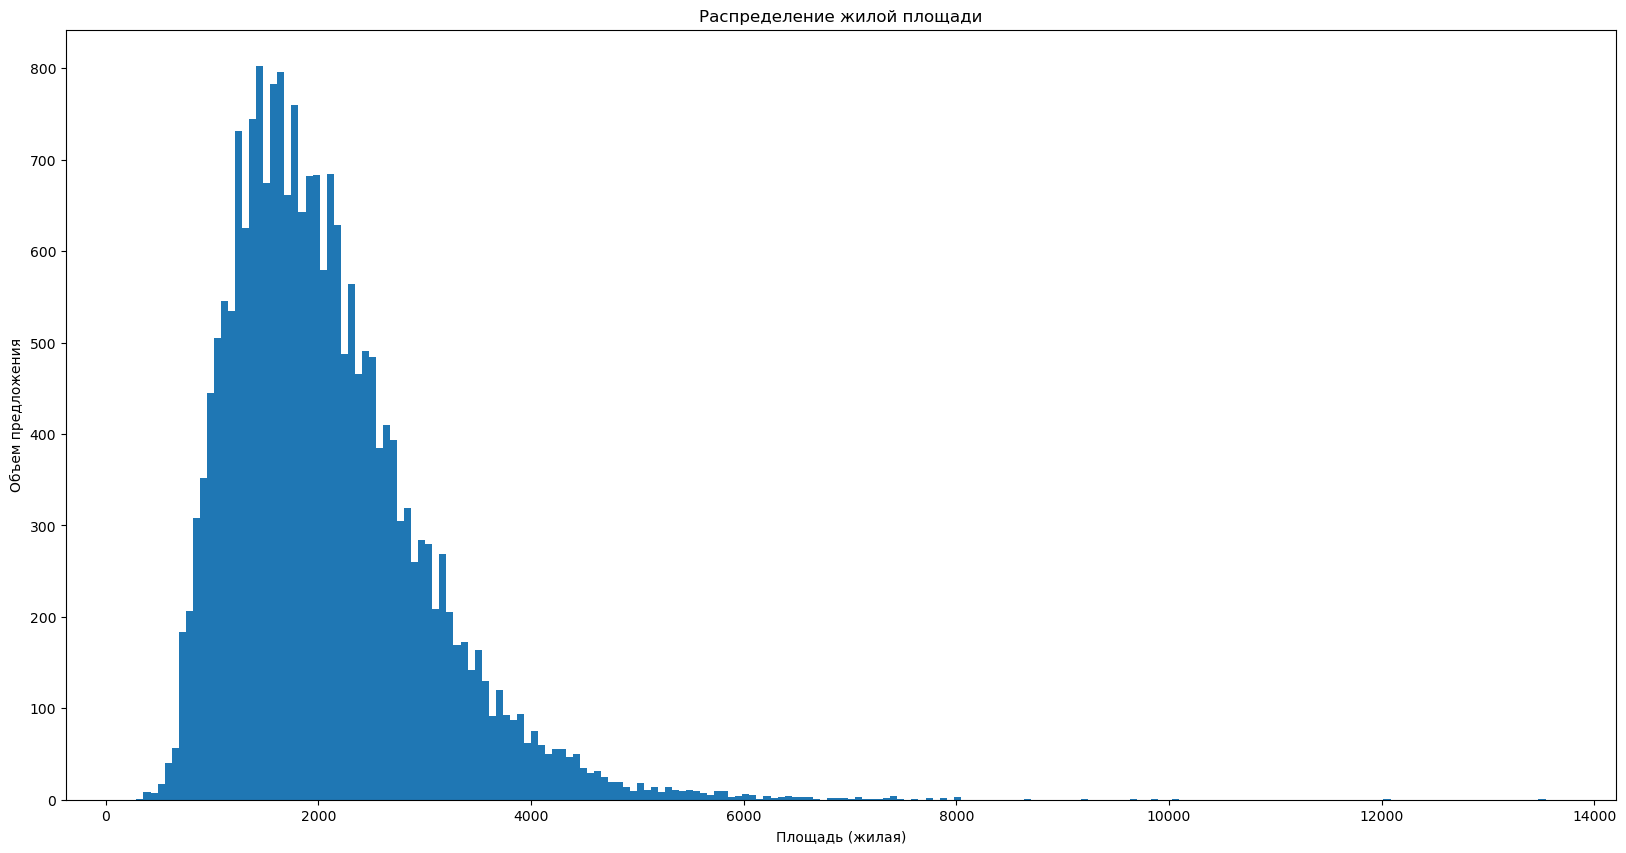

In [13]:
plt.figure(figsize=(20, 10))
plt.hist(df['sqft_living'], bins=200)
plt.title('Распределение жилой площади')
plt.xlabel('Площадь (жилая)')
plt.ylabel('Объем предложения');

Из предварительного анализа распределения жилой площади видно, что диапазон площадей объектов составляет 290 - 13540 кв. футов, средняя жилплощадь объекта составляет 2080 кв. футов, жилая площадь 75% объектов не превышает 2550 кв. футов.
Можно сделать вывод, что наибольшее количество домов предлагается в диапазоне от 1000 до 3000 кв. футов.

In [14]:
year = df['yr_built']
year.value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

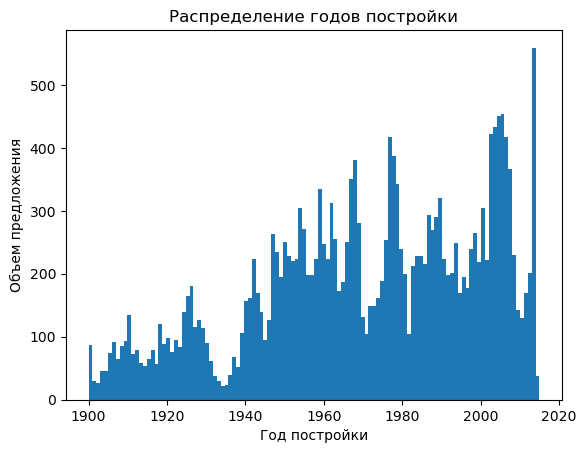

In [15]:
plt.hist(df['yr_built'], bins=116)
plt.title('Распределение годов постройки')
plt.xlabel('Год постройки')
plt.ylabel('Объем предложения');


На графике видны кризисы строительства в районе 30-х, 70-х, 90-х, 2010-х годов. Также виден серьезный спад в 2015 г., почти до уровня 30-х годов.

### Условие 2: 2 задача
- 2.1. Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
- 2.2. Изучите распределение этажей домов
- 2.3. Изучите распределение состояния домов

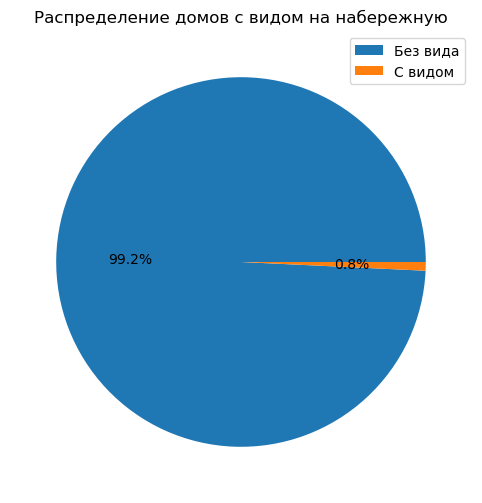

In [16]:
data = df['waterfront'].value_counts()
plt.figure(figsize=(8, 6))
plt.title('Распределение домов с видом на набережную')
data.index = ['Без вида', 'С видом']
plt.pie(data.values, autopct='%1.1f%%')
plt.legend(data.index);


In [17]:
data = df['floors'].value_counts()
data

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

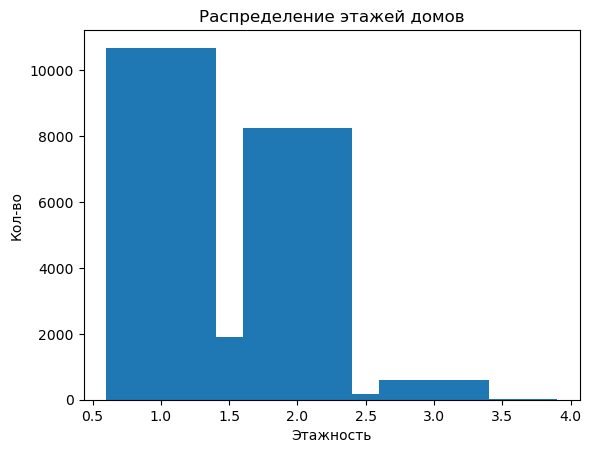

In [18]:
plt.figure()
plt.title('Распределение этажей домов')
plt.xlabel('Этажность')
plt.ylabel('Кол-во')
plt.bar(data.index, data.values);

In [19]:
data = df['condition'].value_counts(ascending=True)
data

1       30
2      172
5     1701
4     5679
3    14031
Name: condition, dtype: int64

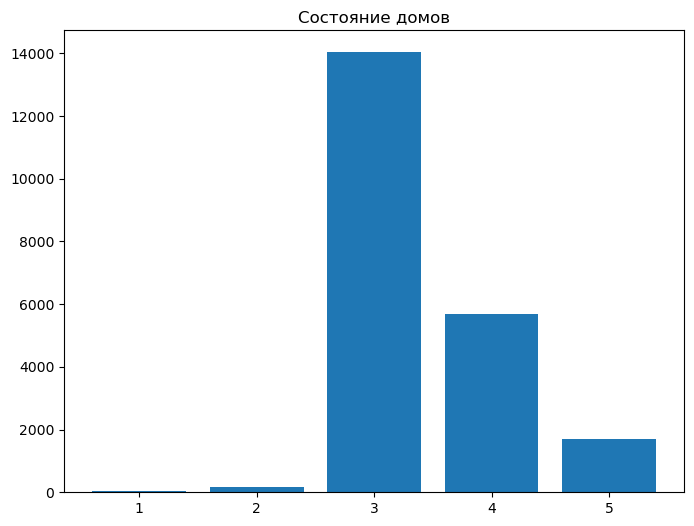

In [20]:
plt.figure(figsize=(8, 6))
plt.title('Состояние домов')
plt.bar(data.index, data.values);